# Hodgkin-Huxleyモデル
## Hodgkin-Huxleyモデルにおける膜の等価回路モデル
**Hodgkin-Huxleyモデル** (HH モデル)は, A.L. HodgkinとA.F. Huxleyによって1952年に考案されたニューロンの膜興奮を表すモデルである {cite:p}`Hodgkin1952-gy`．Hodgkinらはヤリイカの巨大神経軸索に対する**電位固定法**(voltage-clamp)を用いた実験を行い, 実験から得られた観測結果を元にモデルを構築した[^hh]．

[^hh]: HHモデルの構築に関する歴史については([Schwiening, 2012](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3424716/))を参照．

HHモデルには等価な電気回路モデルがあり, **膜の並列等価回路モデル** (parallel conductance model)と呼ばれている．膜の並列等価回路モデルでは, ニューロンの細胞膜をコンデンサ, 細胞膜に埋まっているイオンチャネルを可変抵抗 (動的に変化する抵抗) として置き換える．

**イオンチャネル** (ion channel)は特定のイオン(例えばナトリウムイオンやカリウムイオンなど)を選択的に通す膜輸送体の一種である．それぞれのイオンの種類において, 異なるイオンチャネルがある (同じイオンでも複数の種類のイオンチャネルがある)．また, イオンチャネルにはイオンの種類に応じて異なる**コンダクタンス**(抵抗の逆数で電流の「流れやすさ」を意味する)と**平衡電位**(equilibrium potential)がある．HHモデルでは, ナトリウム(Na$^{+}$)チャネル, カリウム(K$^{+}$)チャネル, 漏れ電流(leak current)のイオンチャネルを仮定する．漏れ電流のイオンチャネルは当時特定できなかったチャネルで, 膜から電流が漏れ出すチャネルを意味する．なお, 現在では漏れ電流の多くはCl$^{-}$イオン(chloride ion)によることが分かっている．

```{figure} ../_static/images/chapter2/parallel_conductance_model.JPG
---
width: 300px
name: parallel_conductance_model
---
Hodgkin-Huxleyモデルの膜の等価回路モデル
```

それでは, 等価回路モデルを用いて電位変化の式を立ててみよう．上図において, $C_m$は細胞膜のキャパシタンス(膜容量), $I_{m}(t)$は細胞膜を流れる電流(外部からの入力電流), $I_\text{Cap}(t)$は膜のコンデンサを流れる電流, $I_\text{Na}(t)$及び $I_K(t)$はそれぞれナトリウムチャネルとカリウムチャネルを通って膜から流出する電流, $I_\text{L}(t)$は漏れ電流である．このとき, 

$$
\begin{equation}
I_{m}(t)=I_\text{Cap}(t)+I_\text{Na}(t)+I_\text{K}(t)+I_\text{L}(t)    
\end{equation}
$$

という仮定をしている．

膜電位を$V(t)$とすると, Kirchhoffの第二法則 (Kirchhoff's Voltage Law)より, 

$$
\begin{equation}
\underbrace{C_m\frac {dV(t)}{dt}}_{I_\text{Cap} (t)}=I_{m}(t)-I_\text{Na}(t)-I_\text{K}(t)-I_\text{L}(t)
\end{equation}
$$

となる．Hodgkinらはチャネル電流$I_\text{Na}, I_K, I_\text{L}$が従う式を実験的に求めた．

$$
\begin{align}
I_\text{Na}(t) &= g_{\text{Na}}\cdot m^{3}h(V-E_{\text{Na}})\\
I_\text{K}(t) &= g_{\text{K}}\cdot n^{4}(V-E_{\text{K}})\\
I_\text{L}(t) &= g_{\text{L}}(V-E_{\text{L}})
\end{align}
$$

ただし, $g_{\text{Na}}, g_{\text{K}}$はそれぞれNa$^+$, K$^+$の最大コンダクタンスである．$g_{\text{L}}$はオームの法則に従うコンダクタンスで, Lコンダクタンスは時間的に変化はしないと仮定する．また, $m$はNa$^+$コンダクタンスの活性化パラメータ, $h$はNa$^+$コンダクタンスの不活性化パラメータ, $n$はK$^+$コンダクタンスの活性化パラメータであり, ゲートの開閉確率を表している．よって, HHモデルの状態は$V, m, h, n$の4変数で表される．これらの変数は以下の$x$を$m, n, h$に置き換えた3つの微分方程式に従う． 

$$
\begin{equation}
\frac{dx}{dt}=\alpha_{x}(V)(1-x)-\beta_{x}(V)x
\end{equation}
$$

ただし, $V$の関数である$\alpha_{x}(V),\ \beta_{x}(V)$は$m, h, n$によって異なり, 次の6つの式に従う．

$$
\begin{array}{ll}
\alpha_{m}(V)=\dfrac {0.1(25-V)}{\exp \left[(25-V)/10\right]-1}, &\beta_{m}(V)=4\exp {(-V/18)}\\
\alpha_{h}(V)=0.07\exp {(-V/20)}, & \beta_{h}(V)={\dfrac{1}{\exp {\left[(30-V)/10 \right]}+1}}\\
\alpha_{n}(V)={\dfrac {0.01(10-V)}{\exp {\left[(10-V)/10\right]}-1}},& \beta_{n}(V)=0.125\exp {(-V/80)} 
\end{array}
$$

なお，この式は6.3℃の条件下においてイカの巨大軸索の活動から得たデータを用いて導かれたものであることに注意しよう．

## Hodgkin-Huxley モデルの定義
これまでに説明した式を用いてHHモデルを実装する．まず必要なパッケージを読み込む．

In [1]:
using Parameters: @unpack # or using UnPack
using PyPlot
rc("axes.spines", top=false, right=false)

In [2]:
abstract type Layer end
abstract type Neuron <: Layer end
abstract type SpikeNeuron <: Neuron end

abstract type Synapse <: Layer end

変更しない定数を保持する `struct` の `HHParameter` と, 変数を保持する `mutable struct` の `HH` を作成する．`v, m, h, n` はHH modelの4変数だが, `r` はpre-synaptic dynamicsを表す変数である．詳細は3章で解説する． 定数は次のように設定する． 

$$
\begin{align}
C_m=1.0, g_{\text{Na}}=120, g_{\text{K}}=36, g_{\text{L}}=0.3\\
E_{\text{Na}}=50.0, E_{\text{K}}=-77, E_{\text{L}}=-54.387 
\end{align}
$$


In [3]:
@kwdef struct HHParameter{FT}
    Cm::FT = 1 # 膜容量(uF/cm^2)
    gNa::FT = 120; gK::FT = 36; gL::FT = 0.3 # Na+, K+, leakの最大コンダクタンス(mS/cm^2)
    ENa::FT = 50; EK::FT = -77; EL::FT = -54 # Na+, K+, leakの平衡電位(mV)
end

@kwdef mutable struct HH{FT} <: SpikeNeuron
    num_neurons::UInt16
    dt::FT = 1e-3
    param::HHParameter = HHParameter{FT}()
    v::Vector{FT} = fill(-65, num_neurons)
    m::Vector{FT} = fill(0.05, num_neurons) 
    h::Vector{FT} = fill(0.6, num_neurons)
    n::Vector{FT} = fill(0.32, num_neurons)
end

In [4]:
@kwdef struct HHKineticSynapseParameter{FT}
    tr::FT = 0.5; td::FT = 8 # ms
    tr⁻¹::FT = 1/tr; td⁻¹::FT = 1/td
    v₀::FT = -20 # mV
end

@kwdef mutable struct HHKineticSynapse{FT} <: Synapse
    num_neurons::UInt16
    dt::FT = 1e-3
    param::HHKineticSynapseParameter = HHKineticSynapseParameter{FT}()
    r::Vector{FT} = zeros(num_neurons)
end

次に変数を更新する関数`update!`を書く．ソルバーとしては陽的Euler法または4次のRunge-Kutta法を用いる．以下ではEuler法を用いている．Juliaではforループを用いて1つのニューロンごとにパラメータを更新する方がベクトルを用いるよりも高速である．

In [5]:
function update!(neuron::HH, x::Vector)
    @unpack num_neurons, dt, v, m, h, n = neuron
    @unpack Cm, gNa, gK, gL, ENa, EK, EL = neuron.param
    @inbounds for i = 1:num_neurons
        m[i] += dt * ((0.1(v[i]+40)/(1 - exp(-0.1(v[i]+40))))*(1 - m[i]) - 4exp(-(v[i]+65) / 18)*m[i])
        h[i] += dt * ((0.07exp(-0.05(v[i]+65)))*(1 - h[i]) - 1/(1 + exp(-0.1(v[i]+35)))*h[i])
        n[i] += dt * ((0.01(v[i]+55)/(1 - exp(-0.1(v[i]+55))))*(1 - n[i]) - (0.125exp(-0.0125(v[i]+65)))*n[i])
        v[i] += dt / Cm * (x[i] - gNa * m[i]^3 * h[i] * (v[i] - ENa) - gK * n[i]^4 * (v[i] - EK) - gL * (v[i] - EL))
    end
    return v
end

update! (generic function with 1 method)

In [6]:
function update!(synapse::HHKineticSynapse, v::Vector)
    @unpack num_neurons, dt, r = synapse
    @unpack tr⁻¹, td⁻¹, v₀ = synapse.param    
    @inbounds for i = 1:num_neurons
        r[i] += dt * ((tr⁻¹ - td⁻¹) * (1 - r[i])/(1 + exp(-v[i] + v₀)) - r[i] * td⁻¹)
    end
    return r
end

(layer::Layer)(x) = update!(layer, x)

## Hodgkin-Huxleyモデルのシミュレーションの実行
いくつかの定数を設定してシミュレーションを実行する．

In [7]:
T = 450 # ms
dt = 0.05 # ms
nt = Int(T/dt) # number of timesteps
num_neurons = 1 # ニューロンの数

# 入力刺激
t = (1:nt)*dt
Ie = repeat(10f0 * ((t .> 50) - (t .> 200)) + 35f0 * ((t .> 250) - (t .> 400)), 1, num_neurons)  # injection current

# 記録用
varr, gatearr = zeros(nt, num_neurons), zeros(nt, 3, num_neurons)
rarr = zeros(nt, num_neurons)

# modelの定義
hh_neurons = HH{Float32}(num_neurons=num_neurons, dt=dt)
hh_synapse = HHKineticSynapse{Float32}(num_neurons=num_neurons, dt=dt)

# simulation
@time for i = 1:nt
    v = hh_neurons(Ie[i, :])
    r = hh_synapse(v)
    varr[i, :] = v
    rarr[i, :] = r
    gatearr[i, :, :] .= [hh_neurons.m; hh_neurons.h; hh_neurons.n]
end

  0.285081 seconds (1.20 M allocations: 48.705 MiB, 2.22% gc time, 85.85% compilation time)


ニューロンの膜電位 `v`, ゲート変数 `m, h, n`, 刺激電流 `I`の描画をする．

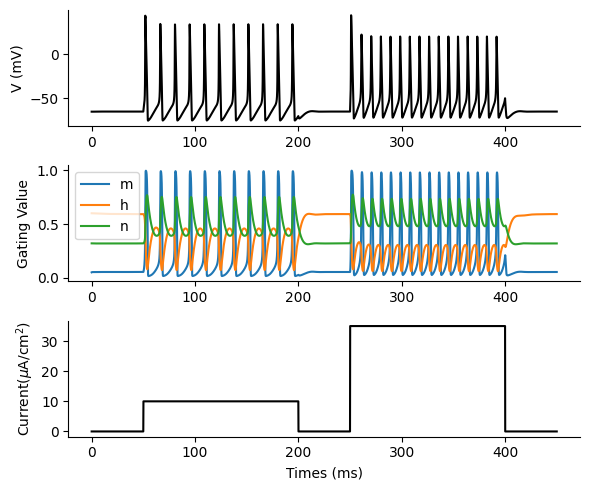

In [8]:
figure(figsize=(6, 5))
subplot(3,1,1); plot(t, varr[:, 1], color="black"); ylabel("V (mV)")
subplot(3,1,2); labellist=["m" "h" "n"] 
for i in 1:3
    plot(t, gatearr[:, i, 1], label=labellist[i])
end; 
ylabel("Gating Value"); legend()
subplot(3,1,3); plot(t, Ie[:, 1], color="black"); ylabel(L"Current($\mu$A/cm$^2$)"); xlabel("Times (ms)")
tight_layout()

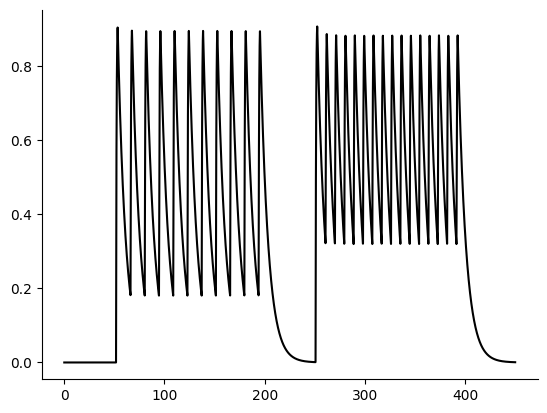

In [9]:
plot(t, rarr[:, 1], color="black");

次項で用いるために発火回数を求める．`bitwise and`を用いると楽である．

In [ ]:
spike = (varr[1:nt-1, :] .< 0) .& (varr[2:nt, :] .> 0)
num_spikes = sum(spike, dims=1)
println("Num. of spikes : ", num_spikes[1])

50msから200msまでで11回, 250msから400msまでで16回発火しているので発火回数は計27回であり，この結果は正しい．

## Frequency-current (F-I) curve
この項ではHodgkin-Huxleyモデルにおいて，入力電流に対する発火率がどのように変化するかを調べる．次のコードのように入力電流を徐々に増加させたときの発火率を見てみよう．

In [ ]:
T = 1000 # ms
dt = 0.05 # ms
nt = Int(T/dt) # number of timesteps

N = 100 # ニューロンの数

# 入力刺激
mincurrent, maxcurrent = 1, 30
t = (1:nt)*dt
Ie_range = Array{Float32}(range(mincurrent, maxcurrent, length=N)) # injection current

# modelの定義
neurons = HH{Float32}(N=N)

# 記録用
varr_fi = zeros(Float32, nt, N)

# simulation
for i = 1:nt
    update!(neurons, neurons.param, Ie_range, dt)
    varr_fi[i, :] = neurons.v
end

発火率を計算して結果を描画する．

In [ ]:
spike = (varr_fi[1:nt-1, :] .< 0) .& (varr_fi[2:nt, :] .> 0)
num_spikes = sum(spike, dims=1)
rate = num_spikes/T*1e3;

In [ ]:
figure(figsize=(4, 3))
plot(Ie_range[:], rate[1, :]); xlabel("Input current"); ylabel("Firing rate (Hz)")
tight_layout()

このような曲線を**frequency-current (F-I) curve** (または neuronal input/output (I/O) curve)と呼ぶ．

## 抑制後リバウンド (Postinhibitory rebound; PIR)
ニューロンは電流が流入することで膜電位が変化し, 膜電位がある一定の閾値を超えると発火が起こる, というのはニューロンの活動電位発生についての典型的な説明である．それではHHモデルの膜電位閾値はどのくらいの値になるのだろうか．答えは「**膜電位閾値は一定ではない**」である．それを示す現象として **抑制後リバウンド** (Postinhibitory rebound; PIR)がある．この時生じる発火を**リバウンド発火** (rebound spikes) 
と呼ぶ．抑制後リバウンドは過分極性の電流の印加を止めた際に膜電位が静止膜電位に回復するのみならず, さらに脱分極をして発火をするという現象である．この現象が生じる要因として

1. **アノーダルブレイク** (anodal break, またはanode break excitation; ABE)
2. 遅いT型カルシウム電流 (slow T-type calcium current)

がある ([Chik et al., 2004](https://pubmed.ncbi.nlm.nih.gov/15324089/))．HH モデルはこのうちアノーダルブレイクを再現できるため, シミュレーションによりどのような現象か確認してみよう．これは入力電流を変更するだけで行える．

In [ ]:
T = 450 # ms
dt = 0.01 # ms
nt = Int(T/dt) # number of timesteps
N = 1 # ニューロンの数

# 入力刺激
t = Array{Float32}(1:nt)*dt
Ie = repeat(10f0 * (-(t .> 50) + (t .> 200)) + 20f0 * (-(t .> 250) + (t .> 400)), 1, N)  # injection current

# modelの定義
neurons = HH{Float32}(N=N)

# 記録用
varr2, gatearr2 = zeros(nt, N), zeros(nt, 3, N)

# simulation
@time for i = 1:nt
    update!(neurons, neurons.param, Ie[i, :], dt)
    varr2[i, :] = neurons.v
    gatearr2[i, :, :] .= [neurons.m; neurons.h; neurons.n]
end

結果は次のようになる．

In [ ]:
figure(figsize=(6, 5))
subplot(3,1,1); plot(t, varr2[:, 1], color="black"); ylabel("V (mV)")
subplot(3,1,2); labellist=["m" "h" "n"] 
for i in 1:3
    plot(t, gatearr2[:, i, 1], label=labellist[i])
end; 
ylabel("Gating Value"); legend()
subplot(3,1,3); plot(t, Ie[:, 1], color="black"); ylabel(L"Current($\mu$A/cm$^2$)"); xlabel("Times (ms)")
tight_layout()

なぜこのようなことが起こるか, というと過分極の状態から静止膜電位へと戻る際にNa$^+$チャネルが活性化 (Na$^+$チャネルの活性化パラメータ$m$が増加し, 不活性化パラメータ$h$が減少)し, 膜電位が脱分極することで再度Na$^+$チャネルが活性化する, というポジティブフィードバック過程(**自己再生的過程**)に突入するためである (もちろん, この過程は通常の活動電位発生のメカニズムである)． この際, 発火に必要な閾値が膜電位の低下に応じて下がった, ということもできる．

このように膜電位閾値は一定ではない．しかし, この後の節で紹介するLIFモデルなどでは簡略化のためにif文を用い, 膜電位閾値を超えたから発火, というものもある．実際には違うということを頭の片隅に残しながら読み進めることを推奨する．

PIRに関連する現象として抑制後促通 (Postinhibitory facilitation; PIF)がある．これは抑制入力の後に興奮入力がある一定の時間内で入ると発火が起こるという現象である ([Dolda et al., 2006](http://www.brain.riken.jp/en/summer/prev/2006/files/j_rinzel04.pdf), [Dodla, 2014](https://link.springer.com/referenceworkentry/10.1007%2F978-1-4614-7320-6_152-1))．

## 参考文献
```{bibliography}
:filter: docname in docnames
```